In [1]:
import tftb
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


T = 2  # signal duration
dt = 1/500  # sample interval/spacing
freq_s = 1/dt  # sampling frequency
N = T / dt  # number of samples
ts = np.arange(N) * dt  # times

#  constructing a chirp multiplied by a Gaussian
t0 = T/2
freq = np.linspace(10, 30, int(N))
sigma = 0.1
signal = np.cos((ts-t0) * 2 * np.pi * freq) * np.exp(-(ts-t0)**2/(2*sigma**2))/np.sqrt(sigma)

# adding some noise
signal += np.random.randn(len(signal))*0.5


#  plotting the signal
plt.figure()
plt.plot(ts, signal)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# first looking at the power of the short time fourier transform (SFTF):
nperseg = 2**6  # window size of the STFT
f_stft, t_stft, Zxx = sig.stft(signal, freq_s, nperseg=nperseg,
                           noverlap=nperseg-1, return_onesided=False)

# shifting the frequency axis for better representation
Zxx = np.fft.fftshift(Zxx, axes=0)
f_stft = np.fft.fftshift(f_stft)

# Doing the WVT
wvd = tftb.processing.WignerVilleDistribution(signal, timestamps=ts)
tfr_wvd, t_wvd, f_wvd = wvd.run()
# here t_wvd is the same as our ts, and f_wvd are t

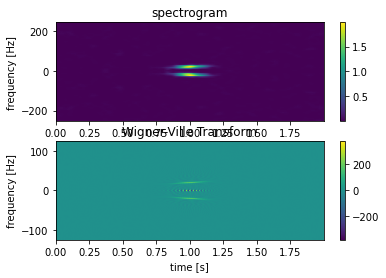

In [6]:

#Now plotting the heatmaps:

f, axx = plt.subplots(2, 1)

df1 = f_stft[1] - f_stft[0]  # the frequency step
im = axx[0].imshow(np.real(Zxx * np.conj(Zxx)), aspect='auto',
          interpolation=None, origin='lower',
          extent=(ts[0] - dt/2, ts[-1] + dt/2,
                  f_stft[0] - df1/2, f_stft[-1] + df1/2))
axx[0].set_ylabel('frequency [Hz]')
plt.colorbar(im, ax=axx[0])
axx[0].set_title('spectrogram')


# because of how they implemented WVT, the maximum frequency is half of
# the sampling Nyquist frequency, so 125 Hz instead of 250 Hz, and the sampling
# is 2 * dt instead of dt
f_wvd = np.fft.fftshift(np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt))
df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT
im = axx[1].imshow(np.fft.fftshift(tfr_wvd, axes=0), aspect='auto', origin='lower',
       extent=(ts[0] - dt/2, ts[-1] + dt/2,
               f_wvd[0]-df_wvd/2, f_wvd[-1]+df_wvd/2))
axx[1].set_xlabel('time [s]')
axx[1].set_ylabel('frequency [Hz]')
plt.colorbar(im, ax=axx[1])
axx[1].set_title('Wigner-Ville Transform')
plt.show()

In [18]:
import numpy as np
N = 100
tdur = 20e-15
sep  = 10e-15
gamma0 = np.around(8000./0.511,3)
detune1 = 0.0001
detune2 = 0.0002
dgam = 0.0
emitnx = 0.3e-6
emitny = 0.3e-6
c_speed = 3e8
Ipeak = 2e3

ts1 = np.linspace(0, tdur, N)
ts2 = np.linspace(tdur + sep, 2*tdur + sep, N)
ts = np.concatenate([ts1, ts2])
zs = ts*c_speed
gamma1 = gamma0*(1 + detune1)*np.ones((N, ))
gamma2 = gamma0*(1 + detune2)*np.ones((N, ))
gamma = np.concatenate([gamma1, gamma2])

I = np.ones((2*N,))*Ipeak

delgam = np.ones((2*N,))*dgam /0.511
enx = np.ones((2*N,))*emitnx
eny = np.ones((2*N,))*emitny


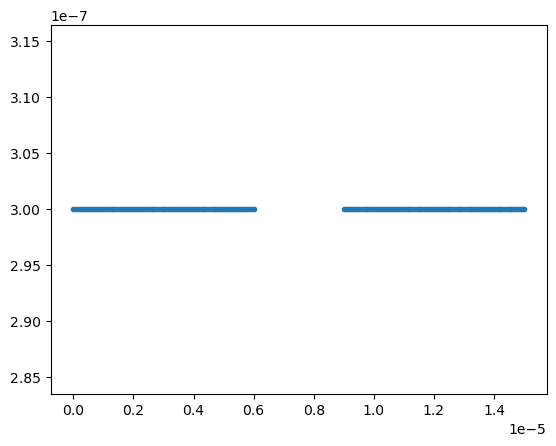

In [23]:
import matplotlib.pyplot as plt
plt.plot(zs, eny, '.')

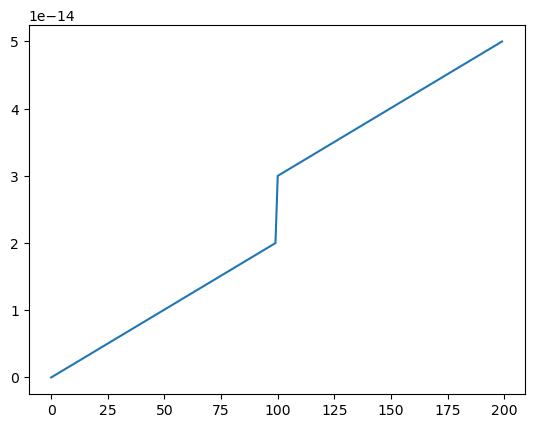

In [15]:
plt.plot(ts)